<a href="https://colab.research.google.com/github/gps-prasad/pytorch/blob/main/linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Check for CUDA availability
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [92]:
weight = 0.7
bias = 0.3
X = torch.arange(start=1,end=10,step=0.2).unsqueeze(dim=1).to(device)
y = weight * X + bias

In [93]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [94]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 10});

In [95]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel,self).__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True))

  def forward(self,X):
    return self.weights * X + self.bias

In [96]:
torch.manual_seed(42)

model_0 = LinearRegressionModel().to(device)
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])

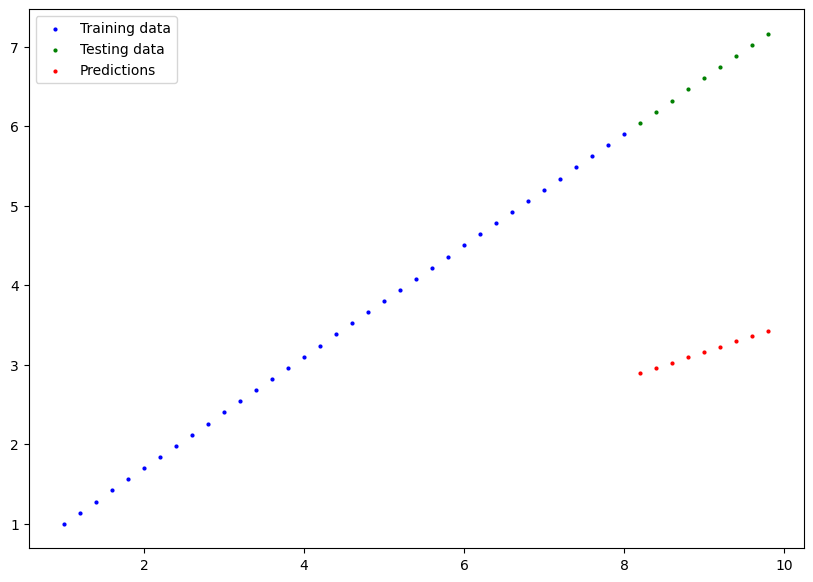

In [97]:
with torch.inference_mode():
  Y = model_0(X_test).cpu().numpy()
  plot_predictions(train_data=X_train.cpu(),
                     train_labels=y_train.cpu(),
                     test_data=X_test.cpu(),
                     test_labels=y_test.cpu(),
                     predictions=Y)

In [98]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)
epochs = 100

train_loss = []
test__loss = []

for epoch in range(epochs):

  model_0.train()

  Y_pred = model_0(X_train)

  loss = loss_fn(Y_pred,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()

  with torch.inference_mode():
    Y_pred = model_0(X_test)

    test_loss = loss_fn(Y_pred,y_test)

    if epoch%10 == 0:
      train_loss.append(loss.detach().cpu().numpy())
      test__loss.append(test_loss.detach().cpu().numpy())
      print(f"Epoch: {epoch+1} | train loss: {loss} | test loss: {test_loss}")



Epoch: 1 | train loss: 1.8060839176177979 | test loss: 3.025977373123169
Epoch: 11 | train loss: 0.08580593764781952 | test loss: 0.3318008780479431
Epoch: 21 | train loss: 0.03602743148803711 | test loss: 0.4235800802707672
Epoch: 31 | train loss: 0.06480477005243301 | test loss: 0.3588031232357025
Epoch: 41 | train loss: 0.03885968402028084 | test loss: 0.40624889731407166
Epoch: 51 | train loss: 0.07613704353570938 | test loss: 0.3294723331928253
Epoch: 61 | train loss: 0.05019187927246094 | test loss: 0.37691763043403625
Epoch: 71 | train loss: 0.03491372615098953 | test loss: 0.404696524143219
Epoch: 81 | train loss: 0.03491372615098953 | test loss: 0.404696524143219
Epoch: 91 | train loss: 0.03491372615098953 | test loss: 0.404696524143219


In [99]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.7055], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.2405], device='cuda:0', requires_grad=True)]

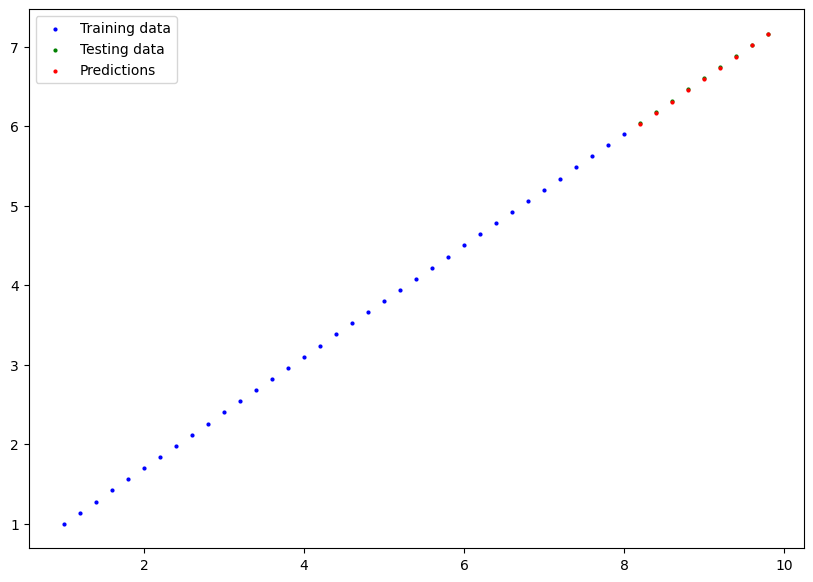

In [100]:
with torch.inference_mode():
  Y = model_0(X_test).cpu().numpy()
  plot_predictions(train_data=X_train.cpu(),
                     train_labels=y_train.cpu(),
                     test_data=X_test.cpu(),
                     test_labels=y_test.cpu(),
                     predictions=Y)